# 安装环境

In [1]:
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15117, done.
remote: Counting objects: 100% (683/683), done.
remote: Compressing objects: 100% (462/462), done.
remote: Total 15117 (delta 271), reused 426 (delta 189), pack-reused 14434
Receiving objects: 100% (15117/15117), 20.70 MiB | 16.71 MiB/s, done.
Resolving deltas: 100% (10576/10576), done.


In [2]:
import os
os.chdir('./mmsegmentation')

In [4]:
!pip install -v -e .

Using pip 21.1.3 from /root/miniconda3/lib/python3.8/site-packages/pip (python 3.8)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-5hdeamgj
Created temporary directory: /tmp/pip-req-tracker-jjcq_4k3
Initialized build tracking at /tmp/pip-req-tracker-jjcq_4k3
Created build tracker: /tmp/pip-req-tracker-jjcq_4k3
Entered build tracker: /tmp/pip-req-tracker-jjcq_4k3
Created temporary directory: /tmp/pip-install-7_rki22l
Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
Obtaining file:///root/workspace/03MMSegmentation/mmsegmentation
  Added file:///root/workspace/03MMSegmentation/mmsegmentation to build tracker '/tmp/pip-req-tracker-jjcq_4k3'
    Running setup.py (path:/root/workspace/03MMSegmentation/mmsegmentation/setup.py) egg_info for package from file:///root/workspace/03MMSegmentation/mmsegmentation
    Created temporary directory: /tmp/pip-pip-egg-info-od0ibc_r
    Running command python setup.py egg_inf

In [5]:
# 检查 mmseg
import mmseg
print('mmseg版本', mmseg.__version__)

mmseg版本 1.0.0


In [7]:
# 配置中文环境
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /root/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /root/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

--2023-06-13 16:32:03--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/root/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/root/miniconda3/li 100%[===================>]   9.58M  19.3MB/s    in 0.5s    

2023-06-13 16:32:04 (19.3 MB/s) - ‘/root/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



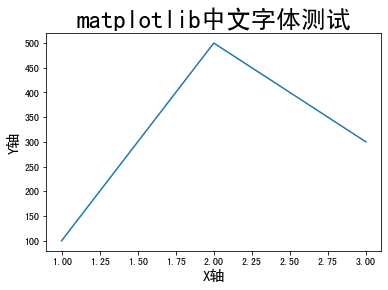

In [8]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# 准备并可视化探索数据集

In [9]:
# 进入终端界面解压数据集
# cd /root/autodl-tmp/MMSeg/
# unzip Watermelon87_Semantic_Seg_Mask.zip 
# 删除冗余文件
# find . -iname '__MACOSX'
# find . -iname '.DS_Store'
# find . -iname '.ipynb_checkpoints'
# 只发现了'.ipynb_checkpoints'
# for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

In [11]:
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data_path = '/root/autodl-tmp/MMSeg/Watermelon87_Semantic_Seg_Mask'

In [27]:
# 指定单张图像路径
img_path = '/root/autodl-tmp/MMSeg/Watermelon87_Semantic_Seg_Mask/img_dir/train/21746.jpg'
mask_path = '/root/autodl-tmp/MMSeg/Watermelon87_Semantic_Seg_Mask/ann_dir/train/21746.png'

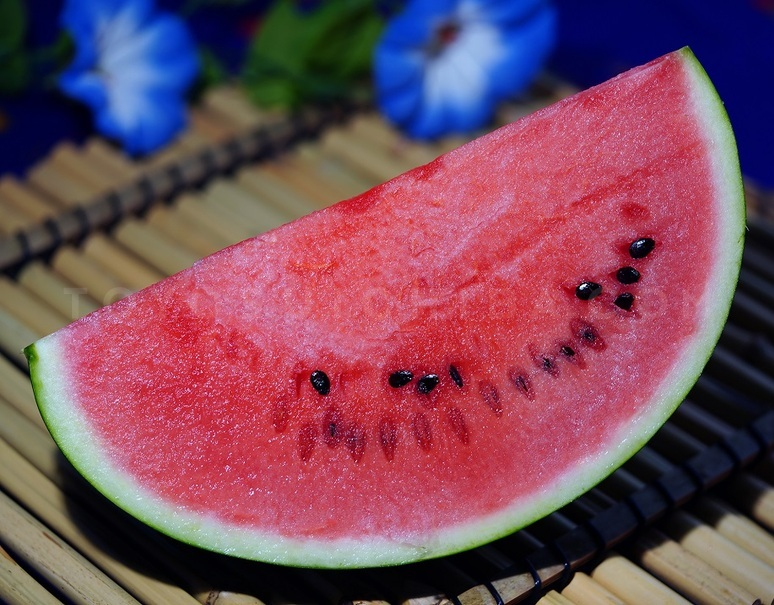

In [28]:
Image.open(img_path)

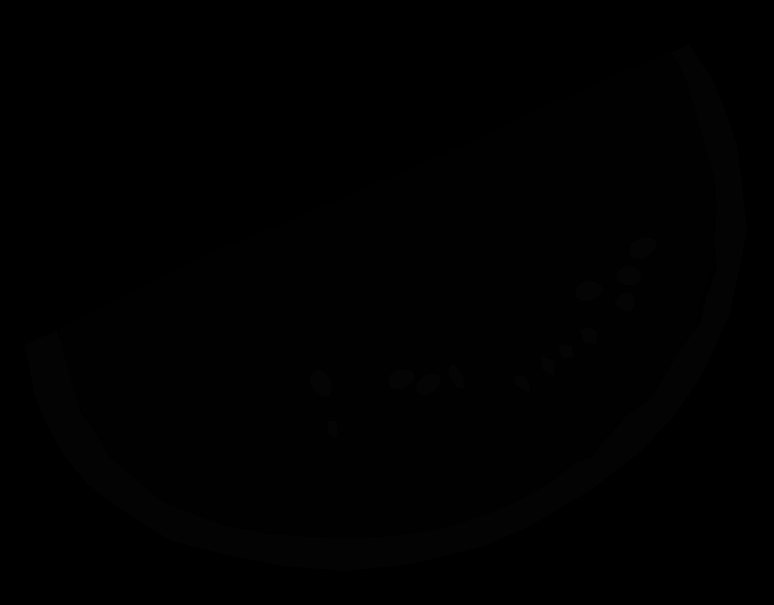

In [29]:
Image.open(mask_path)

In [30]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [31]:
img.shape

(605, 774, 3)

In [32]:
mask.shape

(605, 774, 3)

In [33]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 3, 4], dtype=uint8)

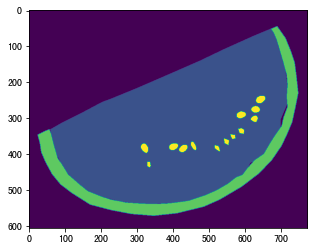

In [34]:
# 可视化语义分割标注
plt.imshow(mask[:,:,0])
plt.show()

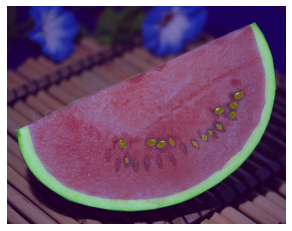

In [35]:
# 叠加在原图进行显示
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.4) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

# 修改配置文件

# 训练

In [ ]:
# python tools/train.py data/pspnet_r50-d8_melon.py

# 可视化训练日志

In [97]:
# 日志文件路径
log_path = 'work_dirs/pspnet_r50-d8_melon/20230614_231504/vis_data/scalars.json'

In [98]:
# 载入训练日志
with open(log_path, "r") as f:
    json_list = f.readlines()

In [99]:
len(json_list)

37

In [100]:
eval(json_list[4])

{'aAcc': 92.07,
 'mIoU': 61.54,
 'mAcc': 66.49,
 'data_time': 0.004071569442749024,
 'time': 0.8178831577301026,
 'step': 400}

In [101]:
import pandas as pd

In [102]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        # df_test = df_test.append(eval(each), ignore_index=True)
        df_test = pd.concat([df_test,pd.DataFrame([eval(each)])],ignore_index=True)
    else:
        # df_train = df_train.append(eval(each), ignore_index=True)
        df_train = pd.concat([df_train,pd.DataFrame([eval(each)])],ignore_index=True)

In [103]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,memory,step
0,0.004989,0.010571,0.847702,0.575579,81.950569,0.272123,79.641151,0.147533,11478,100
1,0.004978,0.007863,0.726873,0.492087,77.191734,0.234786,70.678329,0.145804,3774,200
2,0.004967,0.011098,0.565969,0.390793,93.477821,0.175176,89.970970,0.149802,3774,300
3,0.004956,0.009210,0.635193,0.442796,91.978073,0.192397,89.057541,0.147387,3774,400
4,0.004945,0.014010,0.549759,0.374555,92.214394,0.175204,90.094185,0.152113,10360,500
5,0.004934,0.007452,0.481990,0.322379,89.188385,0.159612,86.038589,0.144652,3774,600
6,0.004923,0.010232,0.411935,0.276806,84.254837,0.135129,84.253311,0.148952,3774,700
7,0.004912,0.009397,0.468496,0.314099,78.301048,0.154397,75.190353,0.148834,3774,800
8,0.004901,0.009140,0.467082,0.319833,91.634369,0.147248,91.809082,0.147622,3774,900
9,0.004890,0.013031,0.353154,0.235139,90.805626,0.118014,91.661835,0.152021,3774,1000


In [104]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

In [105]:
# 可视化辅助函数
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [106]:
# 可视化训练集损失函数损失函数
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

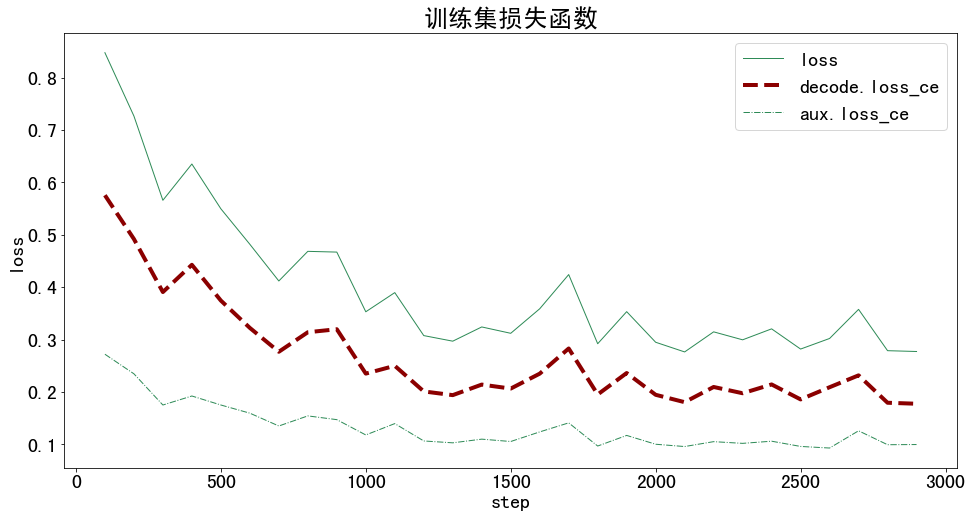

In [107]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [108]:
# 可视化训练集准确率
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'memory', 'step'],
      dtype='object')

In [109]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

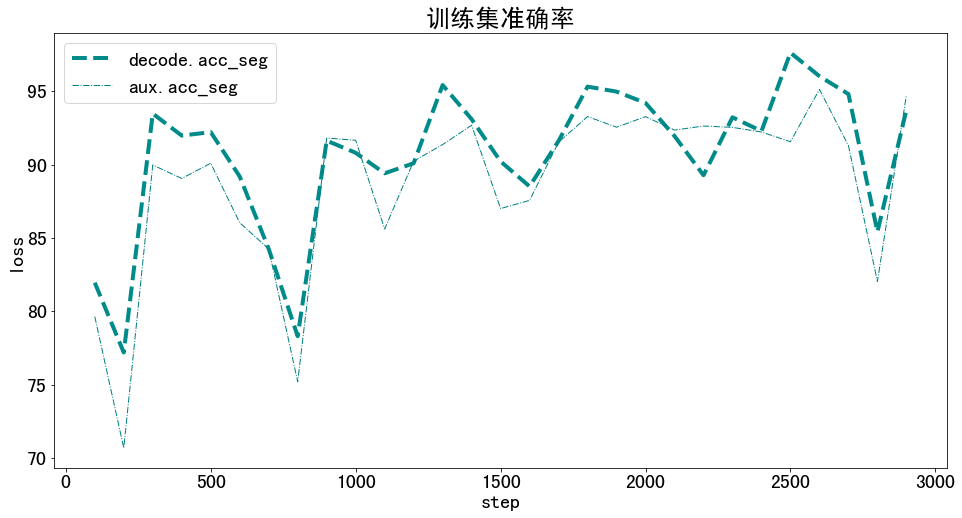

In [110]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()


In [111]:
# 可视化测试集评估指标

In [112]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [113]:
metrics = ['aAcc', 'mIoU', 'mAcc']

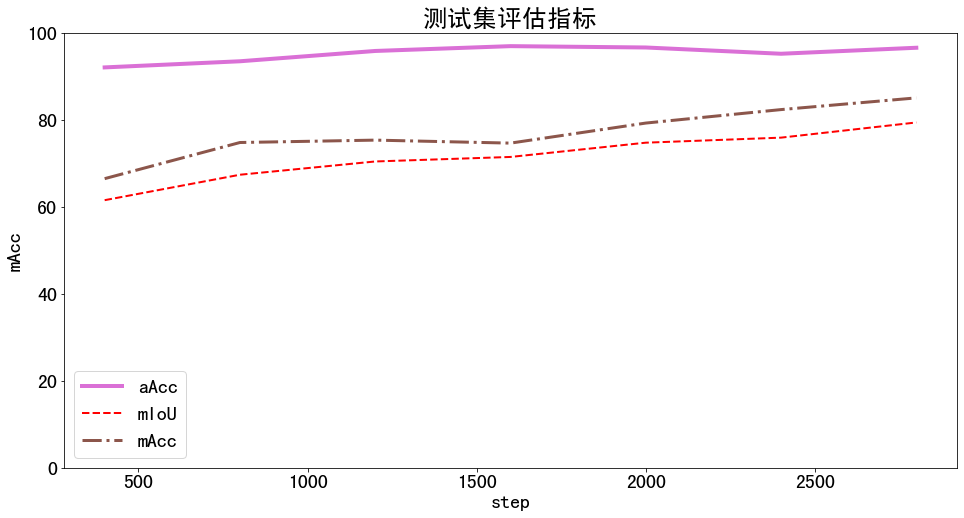

In [114]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()


# 测试集性能指标

In [116]:
!python tools/test.py data/pspnet_r50-d8_melon.py work_dirs/pspnet_r50-d8_melon/best_aAcc_iter_1600.pth

06/15 09:44:37 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 137071979
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.1, V11.1.105
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.9.0+cu111
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencod

# 测试自己图片

In [119]:
!python demo/image_demo.py \
        data/melon.jpg \
        data/pspnet_r50-d8_melon.py \
        work_dirs/pspnet_r50-d8_melon/best_aAcc_iter_1600.pth \
        --out-file outputs/pspnet_img.jpg \
        --device cuda:0 \
        --opacity 0.5

/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: work_dirs/pspnet_r50-d8_melon/best_aAcc_iter_1600.pth
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:11

# 测试自己视频

In [121]:
# 运行得到的视频不知为何无法播放
''' !python demo/video_demo.py \
        data/melon.mp4 \
        data/pspnet_r50-d8_melon.py \
        work_dirs/pspnet_r50-d8_melon/best_aAcc_iter_1600.pth \
        --device cuda:0 \
        --output-file outputs/pspnet_video.mp4 \
        --opacity 0.5'''

/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: work_dirs/pspnet_r50-d8_melon/best_aAcc_iter_1600.pth
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental featur

In [122]:
# 导入工具包
import numpy as np
import time
import shutil

import torch

from PIL import Image
import cv2

import mmcv
import mmengine
from mmseg.apis import inference_model
from mmseg.utils import register_all_modules
register_all_modules()

from mmseg.datasets import WaterMelonDataset

In [123]:
# 载入模型
# 模型 config 配置文件
config_file = 'data/pspnet_r50-d8_melon.py'

# 模型 checkpoint 权重文件
checkpoint_file = 'work_dirs/pspnet_r50-d8_melon/best_aAcc_iter_1600.pth'

In [124]:
from mmseg.apis import init_model
model = init_model(config_file, checkpoint_file, device='cuda:0')

from mmengine.model.utils import revert_sync_batchnorm
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)

/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/root/workspace/03MMSegmentation/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: work_dirs/pspnet_r50-d8_melon/best_aAcc_iter_1600.pth


In [125]:
# input_video = 'data/traffic.mp4'

input_video = 'data/melon.mp4'

In [126]:
temp_out_dir = time.strftime('%Y%m%d%H%M%S')
os.mkdir(temp_out_dir)
print('创建临时文件夹 {} 用于存放每帧预测结果'.format(temp_out_dir))

创建临时文件夹 20230615100037 用于存放每帧预测结果


In [129]:
# 单帧预测
# 获取数据集类别名和调色板
from mmseg.datasets import watermelon
classes = watermelon.WaterMelonDataset.METAINFO['classes']
palette = watermelon.WaterMelonDataset.METAINFO['palette']

In [131]:
def pridict_single_frame(img, opacity=0.2):
    
    result = inference_model(model, img)
    
    # 将分割图按调色板染色
    seg_map = np.array(result.pred_sem_seg.data[0].detach().cpu().numpy()).astype('uint8')
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))
    
    show_img = (np.array(seg_img.convert('RGB')))*(1-opacity) + img*opacity
    
    return show_img

In [132]:
# 逐帧预测
# 读入待预测视频
imgs = mmcv.VideoReader(input_video)

prog_bar = mmengine.ProgressBar(len(imgs))

# 对视频逐帧处理
for frame_id, img in enumerate(imgs):
    
    ## 处理单帧画面
    show_img = pridict_single_frame(img, opacity=0.15)
    temp_path = f'{temp_out_dir}/{frame_id:06d}.jpg' # 保存语义分割预测结果图像至临时文件夹
    cv2.imwrite(temp_path, show_img)

    prog_bar.update() # 更新进度条

# 把每一帧串成视频文件
mmcv.frames2video(temp_out_dir, 'outputs/pspnet_video.mp4', fps=imgs.fps, fourcc='mp4v')

shutil.rmtree(temp_out_dir) # 删除存放每帧画面的临时文件夹
print('删除临时文件夹', temp_out_dir)

[                                                  ] 0/143, elapsed: 0s, ETA:

/root/miniconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 142/142, 72.1 task/s, elapsed: 2s, ETA:     0s[                                                  ] 0/142, elapsed: 0s, ETA:
删除临时文件夹 20230615100037


In [ ]:
# 命令行和API应该是运行方式不同，命令行得到的视频远远大于API得到的视频，且命令行运行视频无法播放